# Relaxation methods for solving the Laplace or Poisson equation

Consider the one-dimensional Laplace equation 

$$\frac{d^2V}{dx^2}=0$$ 

which has the solution $V(x)=ax+b$, where $a$ and $b$ are constants determined by the boundary conditions. A common strategy for solving such a differential equation numerically is to start with an initial guess for the solution, and then gradually "relax" this guess towards the true solution through iteration. One way to do this is with the so-called "Gauss-Seidel" update rule. First we discretize the solution along the domain of interest, $x=j*a$, where $a$ is the step size. We fix the solution at the end points and update the values in between from iteration step $n$ to $n+1$ according to the equation

$$V_j^{n+1}=(V_{j+1}^n+V_{j-1}^{n+1})/2.$$ 

The sample program below illustrates this method for a choice of $V_0 = 0$ and $V_N = 10$. You can see how the (quite bad) initial guess evolves towards the correct solution as n increases.

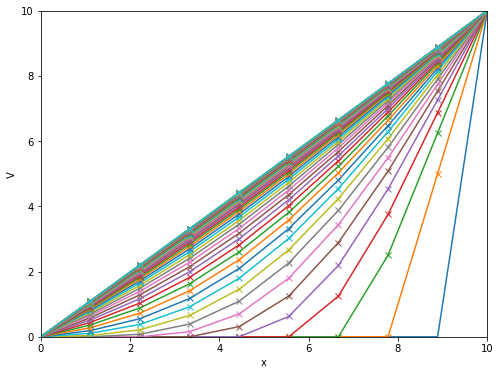

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 10       ## Number of points where we compute the solution

x = np.linspace(0,10,N)  ## Locations where we intend to solve the problem
V = np.zeros(N)         ## Place holder for V where all the guesses are zero

## Setting the boundary values
V[0] = 0
V[N-1] = 10

plt.figure(figsize = (8,6))
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V')
plt.axis([x[0],x[N-1],V[0],V[N-1]]);

## Iterate the soluton and plot each result showing convergence
for j in range(1,50):    
    ## Compute the update (notice the end points are left out)
    for i in range(1,len(V)-1):
        V[i]=0.5*(V[i-1]+V[i+1])    
    plt.plot(x,V,"x-")  


# Assignment

Generalize the procedure described above to two dimensions and solve in a compuational domain of size $N=50$

1. the Laplace equation $$\Delta V(r)=0$$
with the boundary conditions $V(x,0)=V(x,N)=\sin(\pi x/N)$ and $V(0,y)=V(N,y)=\sin(\pi y/N)$.


2. the Poisson equation $$\Delta V(r)=\delta^2 (r)=\delta(x)\delta(y)$$
i.e. place a unit charge at the origin. Set $V(x,y)=0$ everywhere on the boundary.

Present your answer by visualizing the 2D array $V(x,y)$. One quick way to do this is to use the matplotlib function ${\tt pcolor(V)}$, which creates a colour plot on a grid with the colour representing the local value of V.  


<ipython-input-41-20e7cfd10a65>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x, y, V)


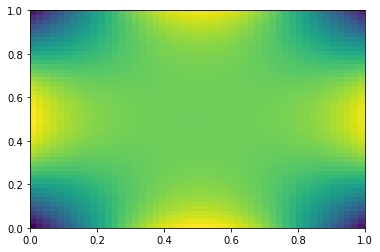

In [41]:
N = 50

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

V = np.zeros_like(X)
V[:, 0] = np.sin(np.pi * x)
V[:, -1] = np.sin(np.pi * x)
V[0, :] = np.sin(np.pi * y)
V[-1, :] = np.sin(np.pi * y)

for i in range(1000):
    for j in range(1, V.shape[0]-1):
        for k in range(1, V.shape[1]-1):
            V[j][k] = 0.25 * (V[j-1][k] + V[j+1][k] + V[j][k-1] + V[j][k+1])

plt.pcolor(x, y, V)

plt.show()

<ipython-input-43-7c398e1a8ac5>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x, y, V)


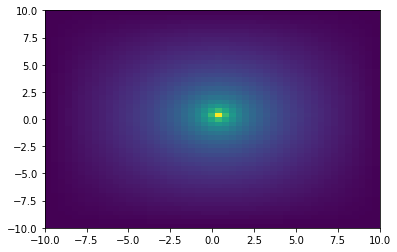

In [43]:
N = 50

x = np.linspace(-10, 10, N)
y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(x, y)

V = np.zeros_like(X)
w, h = V.shape
V[w//2][h//2] = 1

for i in range(1000):
    for j in range(1, V.shape[0]-1):
        for k in range(1, V.shape[1]-1):
            if k != h//2 or j != w//2:
                V[j][k] = 0.25 * (V[j-1][k] + V[j+1][k] + V[j][k-1] + V[j][k+1])

plt.pcolor(x, y, V)

plt.show()